In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_rcv1
from sklearn import datasets
from scipy.spatial import distance

In [83]:
def unique(list): 
    '''
    Creates list with unique values from list
    '''
    # intilize a null list 
    unique_list = []
    # traverse for all elements 
    for x in list: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 

    return unique_list
      

In [84]:
#iris
from sklearn.model_selection import train_test_split
data_all, data_label = datasets.load_iris(return_X_y=True) #datasets.load_breast_cancer(return_X_y=True) #datasets.load_iris(return_X_y=True)
data_all_train, data_all_test, data_label_train, data_label_test = train_test_split(data_all, data_label, test_size=0.3)

number_of_classes = len(unique(data_label))
print(number_of_classes)


3


In [85]:
from sklearn.preprocessing import normalize



data_all= pdd_data
data_label = pdd_label
#map labels to 0-n indexes
class_dict = dict()
i=0
for label in set(data_label):
    class_dict[label] = i
    i+=1
data_all_train, data_all_test, data_label_train, data_label_test = train_test_split(data_all, data_label, test_size=0.3)
number_of_classes = len(unique(data_label))
print(number_of_classes)



3


In [86]:
#convert to numpy
data_all= np.array(data_all)
data_label = np.array(data_label)
data_all_train = np.array(data_all_train)
data_all_test=np.array(data_all_test) 
data_label_train = np.array(data_label_train)
data_label_test = np.array(data_label_test)

In [87]:
data_all_test

array([[5.9, 3. , 4.2, 1.5],
       [5.2, 4.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.1, 2.8, 4. , 1.3],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.8, 4.1, 1.3],
       [4.6, 3.1, 1.5, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [7.7, 2.8, 6.7, 2. ],
       [4.9, 2.5, 4.5, 1.7],
       [5.1, 2.5, 3. , 1.1],
       [6.4, 3.2, 4.5, 1.5],
       [6.5, 3. , 5.5, 1.8],
       [5.7, 2.9, 4.2, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.7, 2.5, 5.8, 1.8],
       [6.3, 3.4, 5.6, 2.4],
       [4.8, 3.4, 1.9, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [6.4, 2.8, 5.6, 2.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.2, 3.4, 5.4, 2.3],
       [7.6, 3. , 6.6, 2.1],
       [5. , 2. , 3.5, 1. ],
       [6.3, 3.3, 4.7, 1.6],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2

In [88]:
pdd = pd.read_csv("D:\Studia\inz\Repos\DataReduction\modules\datasets_csv\iris.csv")#D:\Studia\inz\glass\Titanic.csv", sep = ",") #winequality-red.csv", 
pdd

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [89]:
#testing loading data and encode columns with cathegorial values 
#pdd = pd.read_csv("D:\Studia\inz\datasets\satimage.csv")#D:\Studia\inz\glass\Titanic.csv", sep = ",") #winequality-red.csv", sep = ";") 
#("D:\Studia\inz\datasets\iris\iris_data.csv")
from sklearn import preprocessing as prp

#column with labels, index or column name
label_col = 'class'#"quality"#4

# encoder = prp.LabelEncoder()
# n_features = pdd.shape[1]

# for i in range(n_features):
#     print(pdd.dtypes[i])
#     if(pdd.dtypes[i] == 'object'):
#         print('obj')
#         encoder.fit(pdd.iloc[:, [i]])
#         print(encoder.classes_)
        
#         #pdd.replace(pdd.iloc[:, [i]], encoder.transform(encoder.classes_) )
#         # apply le on categorical feature columns
#         #pdd[i] = pdd[i].apply(lambda col: encoder.fit_transform(pdd.iloc[:, [i]]))

# categorical type filter
categorical_features = pdd.dtypes==object
# filter categorical column
categorical_cols = pdd.columns[categorical_features].tolist()
encoder = prp.LabelEncoder()
# apply encoder on categorical feature columns
try:
    pdd[categorical_cols] = pdd[categorical_cols].apply(lambda col: encoder.fit_transform(col))
except ValueError:
    print("Nothing to encode")
except TypeError: 
    print("TypeError: '<' not supported between instances of 'str' and 'float' During handling of the above exception, another exception occurred:")
########################
if type(label_col)==str: #column name
    #create data frame with class labels
    pdd_label = pdd[label_col]
    #drop column with label 
    pdd_data = pdd.drop(columns=label_col)
else: #column index
    #create data frame with class labels
    pdd_label = pdd[label_col]
    #drop column with label 
    pdd_data = pdd.drop(pdd.columns[label_col], axis = 1)


In [90]:
data_all.shape

(150, 4)

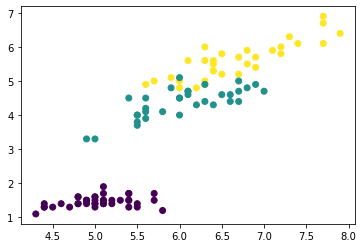

In [91]:
plt.scatter(data_all_train[:,0], data_all_train[:,2],c=data_label_train)

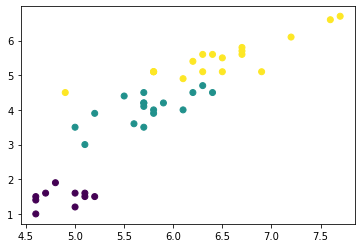

In [92]:
plt.scatter(data_all_test[:,0], data_all_test[:,2],c=data_label_test)

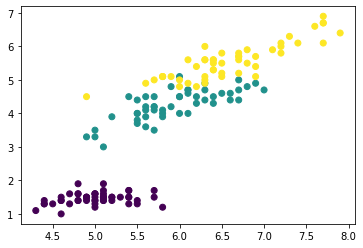

In [93]:
plt.scatter(data_all[:,0], data_all[:,2],c=data_label)

In [94]:
from sklearn.cluster import SpectralClustering #działało ale nie radzi sobie w większej ilości + musi być parzysta liczba klastrów
from sklearn.cluster import AgglomerativeClustering #działa ok
from sklearn.cluster import DBSCAN #zerodivision
from sklearn.cluster import OPTICS #zerodivision - -1 one cluster
import sklearn.cluster as clus
# grouping_types_with_ncl = { kmeans: KMeans(n_clusters=number_of_clusters),
#                         spectral: SpectralClustering(n_clusters=number_of_clusters),
#                         agglomerative: Agglomerative(n_clusters=number_of_clusters)}

In [95]:
def create_clusters(data, number_of_clusters = 20):
    '''
    Function creating n_clusters from data
    Return array of labels of created clusters.
    '''

    #creating clusters using k-means algorithm
    clust = KMeans(n_clusters=number_of_clusters)#AgglomerativeClustering(n_clusters=number_of_clusters)#
    clust.fit(data)
    
    return clust.labels_

In [96]:
def group_id_by_cluster(clusters):
    '''
    Function grouping indexes of data by indexes of clusters
    Return dictionary
    '''
    #creating list grouping idexes of training data grouped by cluster label
    clusters_with_id = defaultdict(list)
    for idx, cluster in enumerate(clusters):
        clusters_with_id[cluster].append(idx)

    return clusters_with_id

In [97]:
from collections import defaultdict

#create clusters
number_of_clusters = 10* number_of_classes
clusters = create_clusters(data = data_all_train, number_of_clusters = number_of_clusters) 
clusters_with_id = group_id_by_cluster(clusters = clusters)


In [98]:
np.array(set(data_label_train))
data_label_train

array([1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2,
       2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2])

In [99]:
x[0]

104

In [100]:
xd.most_common(1)[0][0]

NameError: name 'xd' is not defined

In [101]:
from collections import Counter
xd = Counter(x[0])

TypeError: 'numpy.int64' object is not iterable

In [102]:
xd

NameError: name 'xd' is not defined

In [103]:
x = np.array([['A', 'A', 'B']])

In [104]:
# def median_in_cluster(data_all, indexes):
#     count_of_values = len(indexes)
#     sum = 0

#     # liczba wszystkich wymiarów wzgledem których ma być sumowane
#     count_of_features = data_all[0].shape[0]

#     median = np.array([])
    
#     for feature in range(count_of_features):
#         for index in indexes:
#             actual_data = data_all[index]
#             sum += actual_data[feature]
#         median = np.append(median, sum/count_of_values)
#         sum = 0

#     return median

In [105]:
"""
Function finding index of point in data, nearest to given point. Using for find nerest point of mean in homogeniuos cluster 
TODO czy ma zwracać kilka indesów jeżeli takie same odległosci?
"""
def find_id_of_nearest_point(data_all, indexes, point):
    #id of nearest, for now the first
    id = indexes[0] 
    #minimal distance, for now - the first distance
    min_dist = distance.euclidean(point, data_all[id])

    for i in indexes:
        data = data_all[i]
        dist = distance.euclidean(point, data)
        if min_dist > dist:
            min_dist = dist
            id = i

    return id

In [106]:

def find_nearest_instance(element, indexes_of_data, data_all):
    """
    Function return index of nearest instance to given
    element - index of instance 
    indexes_of_data - indexes of instances from which have to find nearest to element
    data_all - array of all instances to get data of selected index
    """
    point = data_all[element]
    #first temporary index
    id = 0
    #minimal distance, for now - the first distance
    min_dist = distance.euclidean(point, data_all[id])
    for i in indexes_of_data:
        if i == element:
            break
        data = data_all[i]
        dist = distance.euclidean(point, data)
        if min_dist > dist:
            min_dist = dist
            id = i

    return id

In [107]:
# '''
# data_all - data from getting exact
# indexes - indexes of data from data_all
# '''
# def data_for_indexes(data_all, indexes):
#     data_indexes = np.array([])
#     for id in indexes:
#         data_indexes = np.append(data_indexes, data_all[id])

#     return data_indexes

In [108]:

def find_majority_class(number_of_classes, classes_with_indexes):
    """
    Function return index of majority class
    """
    max = len(classes_with_indexes[0])
    majority_class = 0

    for i in range(number_of_classes):
        count = len(classes_with_indexes[i])
        if max < count:
            max = count
            majority_class = i

    return majority_class


In [109]:

def mean_point_in_cluster(data_all, indexes):
    """
    Function calculating mean point in cluster.
    data_all - training dataset
    indexes - array of indexes of cluster form training dataset

    TODO: ZeroDivisionException
    """
    count_of_values = len(indexes)
    sum = 0

    #dimesionality of point
    count_of_features = data_all[0].shape[0]
    mean_point = np.array([])
    
    for feature in range(count_of_features):
        sum = 0
        for index in indexes:
            actual_data = data_all[index]
            sum += actual_data[feature]
        try:
            mean_point = np.append(mean_point, sum/count_of_values)
        except ZeroDivisionException:
            print('Can not division by 0!')

    return mean_point


In [110]:
def group_cluster_by_class(cluster):
    '''
    Function creates array with indexes in cluster grouped by class label
    '''
    #initialize array with 0 occurrence of each class
    classes_with_indexes = []

    #initialize array
    for i in range(number_of_classes):
        classes_with_indexes.append([])

    for instance_id in cluster:
    #checking label of instance
        class_label_of_instance = data_label_train[instance_id]
        #add to array for class label
        classes_with_indexes[class_dict[class_label_of_instance]].append(instance_id)

    return classes_with_indexes
    


In [111]:
def check_homogenious(cluster):
    '''
    Function checking if the cluster is homogenious or not
    Return True if is, False if not.
    '''
    grouped_cluster = group_cluster_by_class(cluster)
    
    is_homogeniuos = True
    count_of_classes_in_cluster = 0
    for i in range(number_of_classes):
        if(len(grouped_cluster[i]) > 0):
            count_of_classes_in_cluster+=1
    if (count_of_classes_in_cluster > 1):
        is_homogeniuos = False
    
    return is_homogeniuos


In [112]:
def prepare_reduced_set(reduced_set):
    '''
    Function prepare reduced dataset grouped by label for using in classificators
    reduced_set - dataset grouped by label

    Return:
    np_red_data - uninterrupted array of instances
    np_red_label - array of labels

    TODO: remove repeated values?
    '''
    
    reduced_labels = []
    tmp = []
    for i in range(number_of_classes):
        for id in reduced_set[i]:
            reduced_labels.append(list(class_dict)[i])
            tmp.append(id.tolist())

    np_red_data = np.array(tmp)
    np_red_label = np.array(reduced_labels)
    
    return np_red_data, np_red_label


In [113]:
def clustering_reduction(clusters_with_id, data_all_train):
    """
    The main function of clustering reduction module
    
    :param clusters_with_id: - indexes of instances from training dataset grouped by indexes of clusters
    :param data_all_train: - training dataset

    :returns: np_red_data - reduced dataset received as a result
    np_red_col - labels of reduced dataset

    """
    classes_with_indexes = []
    #create empty reduced dataset
    reduced_set = []

    #init arrays dimensionality 
    for i in range(number_of_classes):
        classes_with_indexes.append([])
        reduced_set.append([])

    #for each cluster
    for i in range(number_of_clusters):
        #for each instance in cluster
        for instance_id in clusters_with_id[i]:
            class_label_of_instance = data_label_train[instance_id]
            classes_with_indexes[class_dict[class_label_of_instance]].append(instance_id)

        #checking if the cluster is homogenious
        is_homogeniuos = check_homogenious(clusters_with_id[i])


        if (is_homogeniuos):
            #find index of majority class - in this case only one possible
            cm = find_majority_class(number_of_classes, classes_with_indexes)
            #find mean point in cluster 
            mean_point = mean_point_in_cluster(data_all=data_all_train, indexes=clusters_with_id[i])
            #print(mean_point)
            #find index of intance located in cluster nearest to mean point
            accept_id = find_id_of_nearest_point(data_all = data_all_train, indexes = clusters_with_id[i], point = mean_point)
            #print(accept_id)

            #add instance within the class 9to reduced set 
            reduced_set[cm].append(data_all_train[accept_id])
            
        else:
            #majority class in cluster
            cm = find_majority_class(number_of_classes, classes_with_indexes)
            #print(cm)

            #for each instance in other classes find nearest instance to checked from majority class and belonging class
            #add instances to reduced set
            for class_id in range(number_of_classes):
                if class_id == cm:
                    break
                for el in classes_with_indexes[class_id]:
                    #nearest form majority class
                    nearest_of_majority_class = find_nearest_instance(element = el, indexes_of_data = classes_with_indexes[cm], data_all = data_all_train)
                    reduced_set[cm].append(data_all_train[nearest_of_majority_class])
                    #nearest from belonging class
                    nearest_of_actual_class = find_nearest_instance(element = el, indexes_of_data = classes_with_indexes[class_id], data_all = data_all_train)
                    #reduced_set = np.append(reduced_set, data_all_train[nearest_of_actual_class])
                    reduced_set[cm].append(data_all_train[nearest_of_actual_class])
            
        #reset array    
        classes_with_indexes = []
        for j in range(number_of_classes):
            classes_with_indexes.append([])

    np_red_data, np_red_col = prepare_reduced_set(reduced_set)
    return np_red_data, np_red_col

In [114]:
np_red_data, np_red_col = clustering_reduction(clusters_with_id, data_all_train)

In [115]:
features = pdd.columns.values.tolist()

In [116]:
labels = list(class_dict.values())

In [117]:
plt.scatter(data_all_train[:,0], data_all_train[:,1],c=data_label_train, label = labels)
plt.

SyntaxError: invalid syntax (<ipython-input-117-f50226053749>, line 2)

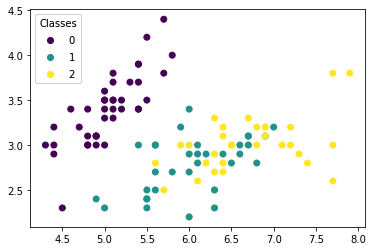

In [118]:
fig, ax = plt.subplots()
scatter = ax.scatter(data_all_train[:,0], data_all_train[:,1],c=data_label_train)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

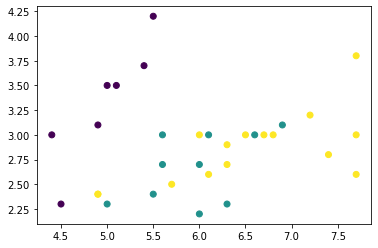

In [119]:
plt.scatter(np_red_data[:,0], np_red_data[:,1],c=np_red_col)

In [120]:
def print_raport(time, accuracy, n_instances):
    """
    Function prints raport
    :param time: elapsed time
    :param accuracy: accuracy of classifier
    :param n_instances: number of instances in fited dataset
    """
    print("Time:  ", time)
    print('Accuracy:  ', accuracy)
    print('Count of instances', n_instances)
    print('=============')

In [121]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


classifiers = {'knn': KNeighborsClassifier(), 
                'svm': svm.SVC(), 
                'naive_bayers': GaussianNB(), 
                'decision_tree': DecisionTreeClassifier(),
                'neutral_network': MLPClassifier()}


# def raport_classify(original_set, original_labels, reduced_set, reduced_labels, test_set, test_labels, classifier_type = 'all'):
#     '''
#     Function creates raport for passed classifier_type. 
#     classifier_type - optional, if not passed raport is creating for all classifiers 
#     original_set - original dataset
#     original_labels - array of labels for original dataset
#     reduced_set - dataset gained after using reduction algorithm 
#     reduced_labels - array of labels for reduced_set
#     '''
#     if classifier_type == 'all':
#         for c_type in classifiers:
#             t = time.process_time()
#             classifier = classifiers[c_type]
#             classifier.fit(original_set, original_labels)
#             accuracy = classifier.score(test_set, test_labels)
#             elapsed = time.process_time() - t
#             print('=============')
#             print("Classifier:  ", c_type)
#             print('=============')
#             print("Raport for original dataset:")
#             print_raport(elapsed, accuracy, len(original_labels))

#             t = time.process_time()
#             classifier = classifiers[c_type]
#             classifier.fit(reduced_set, reduced_labels)
#             accuracy = classifier.score(test_set, test_labels)
#             elapsed = time.process_time() - t
#             print("Raport for reduced dataset:")
#             print_raport(elapsed, accuracy, len(reduced_labels))
#     else:
#         t = time.process_time()
#         classifier = classifiers[classifier_type]
#         classifier.fit(original_set, original_labels)
#         accuracy = classifier.score(test_set, test_labels)
#         elapsed = time.process_time() - t
#         print('=============')
#         print("Classifier:  ", classifier_type)
#         print('=============')
#         print("Raport for original dataset:")
#         print_raport(elapsed, accuracy, len(original_labels))

#         t = time.process_time()
#         classifier = classifiers[classifier_type]
#         classifier.fit(reduced_set, reduced_labels)
#         accuracy = classifier.score(test_set, test_labels)
#         elapsed = time.process_time() - t
#         print("Raport for reduced dataset:")
#         print_raport(elapsed, accuracy, len(reduced_labels))

# raport_classify(data_all_train, data_label_train, np_red_data, np_red_col, data_all_test, data_label_test)

In [122]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix


classify_metrics = {"accuracy": accuracy_score,
                    "f1": f1_score,
                    "precision": precision_score,
                    "recall": recall_score}

                    ###################test
classifier = classifiers['knn']
classifier.fit(data_all_train, data_label_train)
pred = classifier.predict(data_all_test)
# data_all_train, data_label_train, np_red_data, np_red_col, data_all_test, data_label_test
for metric in classify_metrics:
    if (metric == 'accuracy'):
        print(metric, ": ", classify_metrics[metric](data_label_test, pred))
    else: 
        print(metric, ": ", classify_metrics[metric](data_label_test, pred, average=None))

accuracy :  0.9555555555555556
f1 :  [1.         0.94444444 0.94117647]
precision :  [1.         0.89473684 1.        ]
recall :  [1.         1.         0.88888889]


In [123]:
import time

Classifier:   knn
Raport for original dataset
Count of instances:  105
accuracy :  0.9555555555555556
f1 :  [1.         0.94444444 0.94117647]
precision :  [1.         0.89473684 1.        ]
recall :  [1.         1.         0.88888889]
===
Training time:  0.0007963999960338697
Predicting time:  0.0028451999969547614

Raport for reduced dataset
Count of instances:  32
accuracy :  0.9555555555555556
f1 :  [1.         0.94444444 0.94117647]
precision :  [1.         0.89473684 1.        ]
recall :  [1.         1.         0.88888889]
===
Training time:  0.0020972999918740243
Predicting time:  0.0037195000040810555 



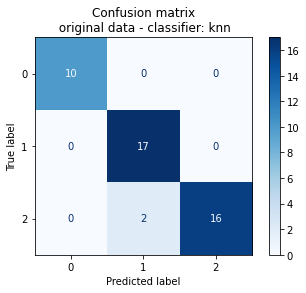

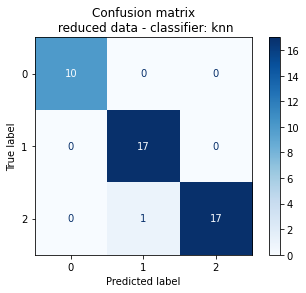

In [124]:
def raport_classify(original_set, original_labels, reduced_set, reduced_labels, test_set, test_labels, c_type = 'all'):
    """
    TODO special classifier
    Function generating raport 

    :original_set: original training dataset
    :original_labels: labels of classes in original trainign dataset
    :reduced_set: reduced training dataset
    :reduced_labels: labels of classes in reduced training dataset
    :test_set: testing dataset
    :test_labels: labels of classes in testing dataset, expected classification results
    :c_type: name of classifier, optional attribute, if not given raport is generated for all classifiers
                       Possible values: 'knn': KNeighborsClassifier(), 
                                        'svm': svm.SVC(), 
                                        'naive_bayers': GaussianNB(), 
                                        'decision_tree': DecisionTreeClassifier(),
                                        'neutral_network': MLPClassifier().
    """
    try:
        if c_type == 'all':
            for c_t in classifiers:
                raport_classify(original_set, original_labels, reduced_set, reduced_labels, test_set, test_labels, c_t)
        else:
            #select classifier
            classifier = classifiers[c_type]
            #train with original dataset and time measure
            start = time.clock()
            classifier.fit(original_set, original_labels)
            end = time.clock()
            training_time = end - start

            #make predictions and time measure
            start = time.clock()
            predict = classifier.predict(test_set)
            end = time.clock()
            prediction_time = end - start

            #create confusion matrix
            plot = plot_confusion_matrix(classifier, data_all_test, data_label_test, cmap=plt.cm.Blues)
            title = "Confusion matrix\n original data - classifier: " + str(c_type)
            plot.ax_.set_title(title)
            plot.figure_.savefig(".\plots\\" + c_type + ' - original data')  

            #print raport with metrics for original training data
            print('=============')
            print("Classifier:  ", c_type)
            print('=============')
            print("Raport for original dataset")
            print('Count of instances: ', len(original_labels))
            for metric in classify_metrics:
                if (metric == 'accuracy'):
                    print(metric, ": ", classify_metrics[metric](test_labels, pred))
                else: 
                    print(metric, ": ", classify_metrics[metric](test_labels, pred, average=None))
            print('===')
            print("Training time: ", training_time)
            print("Predicting time: ", prediction_time)


            #same for reduced training dataset
            classifier = classifiers[c_type]
            start = time.clock()
            classifier.fit(reduced_set, reduced_labels)
            end = time.clock()
            training_time = end - start
            start = time.clock()
            predict = classifier.predict(test_set)
            end = time.clock()
            prediction_time = end - start

            plot = plot_confusion_matrix(classifier, data_all_test, data_label_test, cmap=plt.cm.Blues)
            title = "Confusion matrix\n reduced data - classifier: " + str(c_type)
            plot.ax_.set_title(title)
            plot.figure_.savefig(".\plots\\" + c_type + ' - reduced data')  

            print("\nRaport for reduced dataset")
            print('Count of instances: ', len(reduced_labels))
            for metric in classify_metrics:
                if (metric == 'accuracy'):
                    print(metric, ": ", classify_metrics[metric](test_labels, pred))
                else: 
                    print(metric, ": ", classify_metrics[metric](test_labels, pred, average=None))
                
            print('===')
            print("Training time: ", training_time)
            print("Predicting time: ", prediction_time, "\n")
    except KeyError:
        print('Choose existing classifier!')
    #except:
     #   print('Check propriety of atributes!')

raport_classify(data_all_train, data_label_train, np_red_data, np_red_col, data_all_test, data_label_test, 'knn')

In [125]:
np_red_col

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [126]:
data_label_train

array([1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2,
       2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2])

In [127]:
np.delete(data_label_train, [0,1], axis = 0)

array([2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 1,
       2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2])

In [128]:
knn = KNeighborsClassifier(n_neighbors= 4).fit(data_all_train, data_label_train)
graph = knn.kneighbors_graph().toarray()
indx = knn.kneighbors([data_all_train[0]], return_distance = False)

In [129]:
indx

array([[ 0, 23,  1, 91]], dtype=int64)

In [130]:
graph[4013,0]

IndexError: index 4013 is out of bounds for axis 0 with size 105

In [131]:
n_ins = len(data_all_train)
NN = np.empty((n_ins), dtype=object)
NA = np.empty((n_ins), dtype=object)
NN

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None], dtype=object)

In [132]:
NN[0] = np.where(graph[0] == 1)[0] #indexy sąsiadów
NA[0] = np.where(graph[:,0] == 1)[0] #indexy associates


In [133]:
NN[0][0]

1

In [134]:
knn = KNeighborsClassifier(n_neighbors= 4).fit(data_all_train, data_label_train)
graph = knn.kneighbors_graph().toarray()

n_ins = len(data_all_train)
NN = np.empty((n_ins), dtype=object)
AN = np.empty((n_ins), dtype=object)

for i in range(n_ins):
    NN[i] = np.where(graph[i] == 1)[0] #indexes of neighbours
    AN[i] = np.where(graph[:,i] == 1)[0] #indexes of associates

In [135]:

from scipy.spatial import distance

arr = distance.cdist(data_all_train, data_all_train)

tmp = np.arange(n_ins) #array of original indexes

for i in range(n_ins):
    #arr1 = np.vstack((arr[i], np.array(tmp)))
    #array o
    x = np.argsort(arr[i])
    neigh = []
    enemy = []
    #arr1.sort(axis = 1)
    for j in x:
        if data_label_train[i] == data_label_train[j]:
            neigh.append(j)
        else:
            enemy.append(j)


x


array([104,  12,  74,  47,  93,  30,  82, 102,  97,  75,  21,  78,  90,
        14,   2,   6,  70,  45,  51,  24,  15,  94,  57,  22,  40,  28,
        56,  37,  83,  66,  98,   4,  20,  88,  67,  10,  16,  26,  58,
        18,   8,  31,   9,  61,  11,  73, 103,  43,   3,  13,  52,  33,
        42,  64,  62,  25,  35,  95,  96,  46,  38,  91,   1,  23,   0,
        29,  77,   5,  65,  54,  34,  80,  60,   7,  44,  17,  71,  69,
        81,  99,  87,  86, 101,  19,  59,  89,  85,  41,  48,  72,  49,
       100,  32,  63,  50,  92,  84,  39,  27,  36,  68,  53,  79,  76,
        55], dtype=int64)

In [136]:
lab = list(class_dict.keys())
n_cl = dict.fromkeys(lab, 0)

In [137]:
class_dict

{0: 0, 1: 1, 2: 2}

In [138]:
lab = list(class_dict.keys())
n_cl = dict.fromkeys(lab, 0)
n_cl

{0: 0, 1: 0, 2: 0}

In [139]:
knn4 = KNeighborsClassifier()
knn4.predict([[93,4]])

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [140]:
def group_neigh_enemies(labels, index, sort):
        """
        Function grouping indexes of points with same label and enemies - points with different label.
        Atributes:
        :labels: - array of label for each point in dataset
        :index: - index of point
        :dist_arr: - 1d array of indexes sorted by distance beetween :index:
        Return arrays:
        :neigh: - array of points with same label as point with :index:
        :enemy: - array of points with diferent label than point with :index:
        """
        #init empty arrays
        neigh = []
        enemy = []
        for i in sort:
                if labels[index] == labels[i]:
                    neigh.append(i)
                else:
                    enemy.append(i)

        return neigh, enemy


In [141]:
red_data = []
red_lab = []

In [142]:
        dist_arr = distance.cdist(data_all_train, data_all_train)
        n_ins = len(data_all_train)
        tmp = np.arange(n_ins) #array of original indexes
        nearest_enemy = []
        nearest_enemy_dist = []
    

        #create array with indexes of nearest enemy
        for i in range(n_ins):
            #sort by distance
            sort = np.argsort(dist_arr[i])
            #create sorted array with indexes of neighbours with same label and enemies - with different label
            neigh, enemy = group_neigh_enemies(data_label_train, i, sort)
            #add index of nearest enemy to aray 
            nearest_enemy.append(enemy[0])
            nearest_enemy_dist.append(dist_arr[i][enemy[0]])

        #indexes sorted by nearest enemy distance
        sort = np.argsort(nearest_enemy_dist)
        s = sort
        added = []
        for i in sort:
            add = False
            for j in sort:
                if j in s and dist_arr[i][j] < nearest_enemy_dist[j]:
                    s = np.delete(s, np.where(s==j))
                    add = True
            
            if add and i not in added:
                red_data.append(data_all_train[i])
                red_lab.append(data_label_train[i])
                added.append(i)


In [143]:
a[0]

list

In [144]:
a = np.array([])
for i in range(n_ins):
    a = np.append(a, np.array(list))

a[56] = [4.565,546.546,7]

In [145]:
class_dict = {'i1': 0, 'i2': 1, 'i3': 3}

In [146]:
lab = list(class_dict.values())

In [147]:
red_data[0]

array([6. , 3. , 4.8, 1.8])

In [148]:
dist_arr[8]

array([1.95192213, 1.33041347, 0.96436508, 0.58309519, 0.43588989,
       3.38969025, 1.00498756, 3.57910603, 0.        , 0.77459667,
       0.43588989, 0.14142136, 1.77482393, 0.50990195, 1.19582607,
       0.74161985, 0.43588989, 3.6       , 0.7       , 3.65923489,
       0.60827625, 1.42126704, 2.88097206, 1.92093727, 0.86023253,
       0.79372539, 0.51961524, 3.82099463, 0.73484692, 3.3436507 ,
       1.27671453, 0.59160798, 3.87169214, 0.42426407, 3.46121366,
       0.80622577, 3.87943295, 0.52915026, 1.06770783, 3.77888873,
       2.83019434, 3.7       , 0.55677644, 0.24494897, 3.50285598,
       1.76068169, 1.1045361 , 1.68226038, 3.66196668, 3.66196668,
       3.71214224, 1.161895  , 0.70710678, 3.96106046, 3.3436507 ,
       4.23083916, 0.9486833 , 2.70185122, 0.54772256, 3.66878727,
       3.69459064, 0.87749644, 0.74161985, 3.74566416, 0.74161985,
       3.31209903, 0.64031242, 0.5       , 3.90128184, 3.58468967,
       0.88317609, 3.58887169, 3.66196668, 0.2236068 , 1.59373

In [149]:
assot = []

for i in range(n_ins):
    # np.append(assot, 6)
    assot.append(np.argsort(dist_arr[i]))

In [150]:
dataset = pd.read_csv('D:\Studia\inz\datasets\\abalone.data.txt', sep = ',')

In [151]:
dataset

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [152]:
object in dataset.dtypes

False

In [153]:


for col in data_all.columns:
    print(is_numeric_dtype(data_all[col]))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [154]:
dataset.dtypes.values

array([dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('int64')], dtype=object)

In [155]:
data_all.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [156]:
data_all = dataset.drop(columns='M')

In [157]:
print('File {} not found'.format(n_ins))

File 105 not found


In [164]:
'knn' not in classifiers

False

In [159]:
def load_dataset(name = None, filepath = None, class_col = 'class', sep = ','):
        """
        Function loading dataset to pandas dataframe
        """

        if name and filepath == None:
            raise Exception('Cant load data without name of dataset or filepath of dataset file!')

        #open file
        if filepath:
            try: 
                dataset = pd.read_csv(filepath, sep = sep)
                load_csv()
                prepare_dataset()
            except FileNotFoundError:
                raise Exception("File {} not found. Please select the existing csv file!".format(filepath))
            except OSError:
                raise Exception('Can not use file in path {}. Please select the apriopriate filepath!'.format(filepath))
            except ValueError:
                raise Exception('Can not use file in path {}. Please select filepath with apriopriate extension!'.format(filepath))
            except:
                raise Exception('Please select csv filepath with apriopriate extension.')

        elif name:
            if self.dataset_name not in dataset_path:
                raise Exception('Dataset {} not found. Please select apriopriate dataset name!'.format(name))
            else:
                dataset = pd.read_csv(dataset_path[self.dataset_name])
                load_named()
                prepare_dataset()


In [160]:
class NotLoadedException(Exception):
    def __init__(self, message):
        self.message = message

In [161]:
from pandas.api.types import is_numeric_dtype
def from_csv(filepath, class_col, sep = ','):
    
    #check loaded
    try:
        dataset == None
    except NameError:
        raise NotLoadedException('Dataset must be loaded before preparation')

    #constains more than one column
    if len(dataset.columns) < 2:
        raise Exception('Dataset must have minimum 2 columns! Please check if you select apriopriate filepath or separator.')

    #contains missing values
    if dataset.isnull().values.any() == True:
        raise Exception('Dataset contains Nan values. Please fill missing values before use class.')

    #constains class column
    if class_col in dataset.columns:
        data_label = dataset[class_col]
        data_all = dataset.drop(columns=class_col)
        features = data_all.columns.values.tolist()
    else:
        raise Exception('Please select existing column name as class column.')

    #constains only numeric values
    for col in data_all.columns:
        if not is_numeric_dtype(data_all[col]):
            raise Exception('Dataset constains non numeric values.')

    #reszta tak jak jest od normalizacji
    


     

    
    


In [ ]:
class Data:

    def __init__(self, name = None, ):
        
        #if one arg:
        if len(args) == 1:
    

In [7]:
type(None) !=str

True

In [162]:
######################
######################
#TODO all function 
#find variebles usen in defs
#class_dict, 
def main_clustering_reduction(data: DataPreparation, n_clusters = 20):
    """
    The main function in module, runs all required functions for data and returns reduced data

    TODO data must be a class consisting of data_all, class_map, n_classes etc.
    """
    #create clusters
    clusters = create_clusters(data = data_all_train, number_of_clusters = n_clusters)
    #group clusters 
    clusters_with_id = group_id_by_cluster(clusters = clusters)
    #run algorithm

    np_red_data, np_red_col = clustering_reduction(clusters_with_id, data_all_train)
    

NameError: name 'DataPreparation' is not defined

In [27]:
rel = "D:\Studia\inz\Repos\DataReduction\Module\InstanceReduction\Reduction\__init__.py"
rel = "D:\Studia\inz\Repos\DataReduction\README.md"
absol = "D:\Studia\inz\Repos\DataReduction\Module\InstanceReduction\datasets_csv\glass.csv"
shit = "xx"

In [47]:
import os
import pandas as pd

if not os.path.isabs(rel):
    rel = os.path.join(os.getcwd(),rel)

dataset = pd.read_csv(rel, sep = ' ')
dataset.columns

Index(['#', 'DataReduction'], dtype='object')

In [49]:
dataset['f']

KeyError: 'f'

In [56]:
dataset.iloc[:, 0]

Series([], Name: #, dtype: object)

In [74]:
d = pd.read_csv("D:\Studia\inz\Repos\DataReduction\Module\InstanceReduction\datasets_csv\iris.csv")
lab = d.iloc[:,4].to_numpy()

In [97]:
data = {'iris': [150, 3], 
    'pendigits': [10992, 10], 
    'letter': [20000, 26]}

In [99]:
params=[150, 10992, 20000]
n =['iris', 'pendigits', 'letter']
tuple(params,n)

TypeError: tuple expected at most 1 arguments, got 2

In [ ]:


def test_len_data_all(dataset_names, len_data_all):
    d = DataPreparation(dataset_names)
    assert len(d.data_all) == len_data_all

In [95]:
col = 4
if col not in d.columns:
    if col > len(d.columns):
        raise IndexError('Index of class column is out of range')
    elif type(col) == int:
        print(d.iloc[:,col])
d = d.drop(d.columns[col], axis = 1)

d

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
5         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 149, dtype: object


,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
5,5.4,3.9,1.7,0.4
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
class x:
    pass

xi = -1.45 #x()
if not isinstance(xi, x):
    raise TypeError('Atribute \'data\' must be DataPreparation instance')


TypeError: Atribute 'data' must be DataPreparation instance

In [13]:
np.array(DataPreparation)

NameError: name 'DataPreparation' is not defined

In [20]:
import numpy as np
arr = np.array([4,5,66])
type(arr) == np.ndarray

True

In [24]:
lis[-4]

IndexError: list index out of range

In [16]:
lis = [5,6,7]

for l in [arr, lis]:
    print(type(l) == list)

False
True


In [10]:
i =0
i in range(0,5)


True

In [13]:
import numpy as np
arr = np.arange(5)
arr.shape[1]

5